# LOGISTIC REGRESSION pada BINARY CLASSIFICATION TASK 

Sumber : 
- https://www.youtube.com/watch?v=oe7DW4rSH1o&ab_channel=IndonesiaBelajar

## Dataset : SMS Spam Collection Data Set

Sumber Data : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

Langkah-langkah:
- Mengimport module pandas as pd
- Mendownload file dataset SMS Spam Collection Data Set dari UCI Machine Learning Repository
- Kemudian load file dataset sebagai pandas dataframe dengan pd.read_csv
- Karena SMS dataset ini separatornya menggunakan tab maka kita spesifikasikan dengan '\t'
- Karena tidak menggunakan header, maka Header=None
- Dataset ini akan diberikan label kolom dengan nama 'label' dan 'sms'\
- Kemudian hasilnya akan ditampung ke dalam variable 'df' 

In [21]:
import pandas as pd 

df = pd.read_csv('./SMSSpamCollection',
                sep='\t',
                header=None,
                names=['label','sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dapat dilihat dari hasil output di atas, bahwa terdapat kolom label dan sms. Kolom 'sms' berisi sekumpulan text sms yang akan dijadikan features.
Kolom 'label' berisi tentang klasifikasi dari setiap text smsnya. 

Pada kolom label terdapat 'ham' dan 'spam'. 
Sms text yang dikategorikan sebagai 'spam' maka akan memiliki label spam.
Sedangkan apabila sms text dikategorikan sebagai bukan spam maka akan memiliki label ham. 

Pada tahap ini, kita akan melakukan prediksi suatu text sms apakah termasuk spam atau ham dengan menggunakan logistic regression. 

In [22]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Dapat dilihat hasil output diatas bahwa sms text yang termasuk ke dalam kategori 'ham' terdapat 4825 dan 'spam' terdapat 747. 

## Training & Testing Dataset

Kita akan membagi datasetnya menjadi 2 bagian yaitu training dataset dan testing dataset.  

Langkah-langkahnya :
- Import dahulu modulenya yaitu import LabelBinarizer
- Sekumpulan nilai 'sms' akan dimasukkan ke dalam variable 'X'
- Sekumpulan dari kolom 'label' akan dimasukkan ke dalam variable 'y'
- Membentuk objek class dari LabelBinarizer dan objeknya akan dimasukkan ke dalam variable 'lb'
- Kemudian melakukan fit.transform dari objek 'lb' dan fit.transform ini akan dikenakan pada variable 'y'. Hasil dari fit.transform ini akan menghasilkan multi dimensional array, dan disini kita akan mengkonversi menjadi array 1 dimensi dengan menggunakan method ravel(). Hasilnya akan ditampung ke dalam variable 'y'
- Kemudian kita akan mencoba mencari tahu proses dari label binarizernya dengan memanggil method lb.classes_

In [23]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

Output diatas menjelaskan bahwa 'ham' akan diinterpretasikan sebagai 0 dan 'spam' akan diinterpretasikan sebagai 1. 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=0)
print(X_train,'\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


## Feature Extraction dengan TF-IDF

Pada tahap ini, saya akan menggunakan TF-IDF.

Langkah-langkah:
- Mengimport modulenya yaitu TfidfVectorizer 
- Membentuk objek TfidfVectorizer dengan parameter stop_words yang berisi 'english'. Objek ini akan ditampung ke dalam variable 'vectorizer'
- Memanggil fit_transform dari objek vectorizer ini dan akan dikenakan pada X_train yang kemudian akan dimasukkan ke dalam variable 'X_train_tfidf'
- Kemudian kita akan melakukan transform dari objek vectorizer yang dikenakan pada X_test, kemudian akan dimasukkan ke dalam variable 'X_test_tfidf'

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

Melalui hasil output di atas, dapat dilihat bahwa nilai yang ditampung bukan berupa text SMS tetapi berupa Vector TF_IDF

## Binary Classification dengan Logistic Regression 

Pada tahap ini, saya akan menerapkan Logistoc Regression untuk melakukan klasifikasi 'ham' dan 'spam' pada dataset SMS yang kita miliki. 

Langkah-langkah:
- Mengimport module LogisticRegression 
- Membentuk objek LogisticRegression yang kemudian akan dimasukkan ke dalam variable 'model' 
- Kemudian objek model ini akan ditraining dengan memanggil method 'fit' dan menyertakan X_train_tfidf, y_train sebagai parameter untuk training = maka model ini akan menjadi trained model 
- trained model ini akan digunakan untuk melakukan prediksi dan sekumpulan nilai yang akan diprediksi adalah label berdasarkan data-data features yang ditampung pada 'X_test_tfidf'
- Melakukan looping untuk menampilkan 5 hasil prediksi pertama 

In [26]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



 ## Evaluation Metrics pada Binary Classification 

### - Confusion Matrix
### - Accuracy
### - Prevission & Recall
### - F1 Score
### - ROC

## Terminologi Dasar

### - True Positive (TP)
### - True Negative (TN)
### - False Positive (FP)
### - False Negative (FN)

True Positive dan True Negative merepresentasikan hasil prediksi/klasifikasi yang benar. 
- True positive berarti sesuatu yang bernilai positif dengan tepat diprediksi sebagai positive oleh model, contohnya adalah model telah dengan tepat memprediksi data spam sebagi spam dan data ham sebagai data ham 
- True negative berarti sesuatu yang bernilai negatif dengan tepat diprediksi sebagai negative oleh model, contohnya adalah  model telah dengan tepat memprediksi data ham sebagai bukan data spam  dan data spam sebagai bukan data ham 

False Positive dan False Negative merepresentasikan hasil prediksi yang salah
- False positive berarti sesuatu yang bernilai negative dengan keliru diprediksi sebagai positive oleh model, contohnya adalah model telah memprediksi dengan keliru data spam sebagi ham dan data ham sebagai data spam. 
- False negative berarti sesuatu yang bernilai positive dengan keliru diprediksi sebagai negative oleh model, contohnya adalah model telah memprediksi dengan keliru data spam sebagi bukan data spam dan data ham sebagai bukan data ham. 

## Confusion Matrix 

Confusion matrix seringkali juga dikenal sebagai error matrix. 
Confusion matrix berperan untuk menampilkan nilai true negative, true positive, false negative, dan false positive. 

Langkah-langkah:
- Import module confusion_matrix 
- Memanggil confusion_matrix dengan parameter 'y_test' dan 'y_pred' yang kemudian ditampung pada variable 'matrix'

In [27]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [28]:
tn, fp, fn,tp = matrix.ravel()

print(f'TN:{tn}')
print(f'FP:{fp}')
print(f'FN:{fn}')
print(f'TP:{tp}')

TN:1207
FP:1
FN:48
TP:137


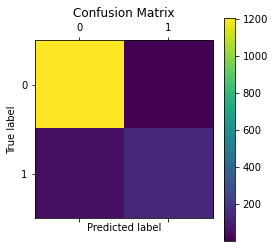

In [29]:
import matplotlib.pyplot as plt 

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Method colorbar ini untuk memunculkan color bar di samping kanan.
- Warna kuning merepresentasikan nilai True Negative 
- Warna ungu muda merepresentasikan nilai True Positive 

Berarti warna kuning dan ungu muda merupakan hasil prediksi yang tepat.
- Warna ungu tua yang berada di sebelah kanan atas merepresentasikan False Positive, karena seharusnya datanya adalah data ham tetapi diprediksi sebagai data spam
- Warna ungu tua yang berada di sebelah kiri bawah merepresentasikan False Negative, karena seharusnya datanya adalah data spam tetapi diprediksi sebagai data ham

## Accuracy 

Accuracy mengukur porsi dari hasil prediksi yang tepat. 

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.964824120603015

## Precission & Recall 

Selain menggunakan accuracy, performa dari suatu classifier umumnya juga diukur berdasarkan nilai Precission dan Recall.

In [32]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9927536231884058

Rentang nilai precision_score dari 0 sampai 1.

### Recall or True Positive Rate (TPR) or Sensitivity

In [33]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7405405405405405

## F-1 Score

F1-score atau F1-measure adalah harmonic mean dari precission dan recall

In [34]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.8482972136222909

## ROC: Receiver Operating Characteristic

ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR)

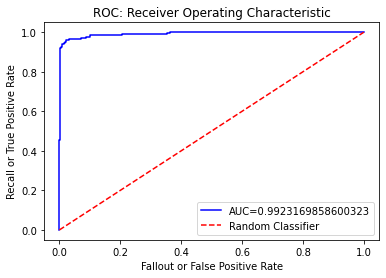

In [35]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)

fpr,tpr, threshhold = roc_curve(y_test, prob_estimates[:,1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1],[0,1],'r--',label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()